# Boston House Price Projection

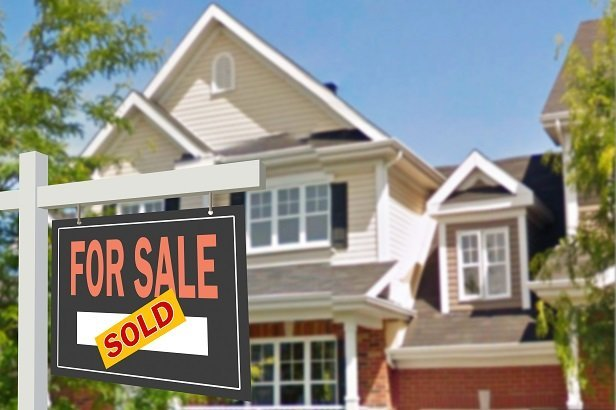

In [1]:
from IPython.display import Image
Image("house.jpeg")

### 1. Some Useful Packages

In [2]:
# Basic packages
import numpy as np
import pandas as pd
np.random.seed(42)

# Packages for Visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('seaborn-notebook')

### 2. Read Data & Quick Overview

In [3]:
df = pd.read_csv('boston_house_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


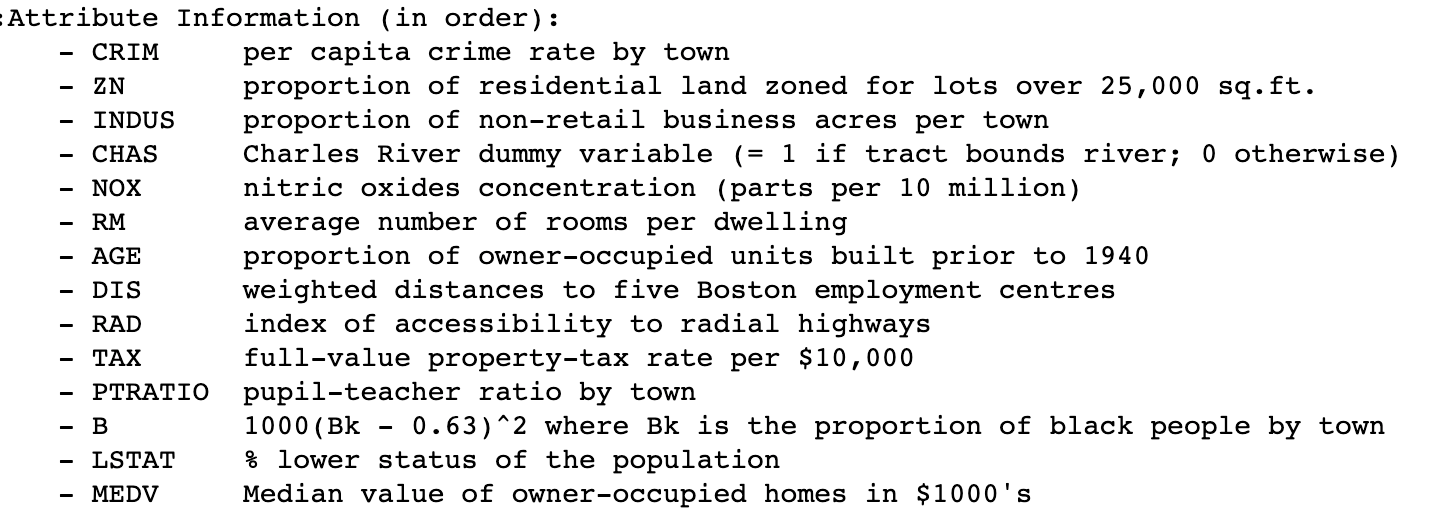

In [4]:
Image("feature explanation.png")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# show data distribution
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 3. Data Exploration

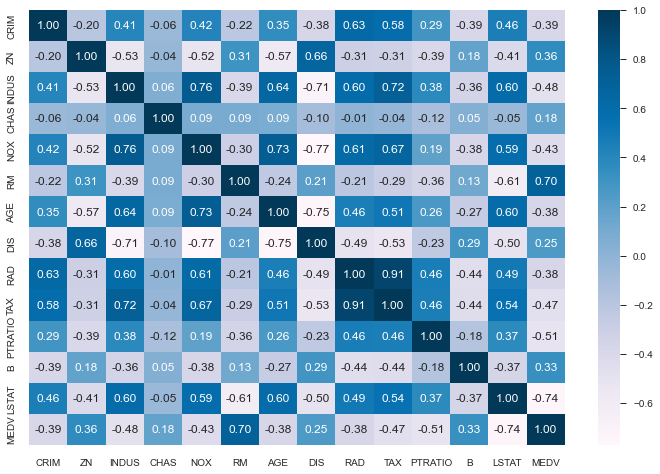

In [7]:
# show data correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='PuBu')
plt.show()

In [8]:
# show data correlation with target
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

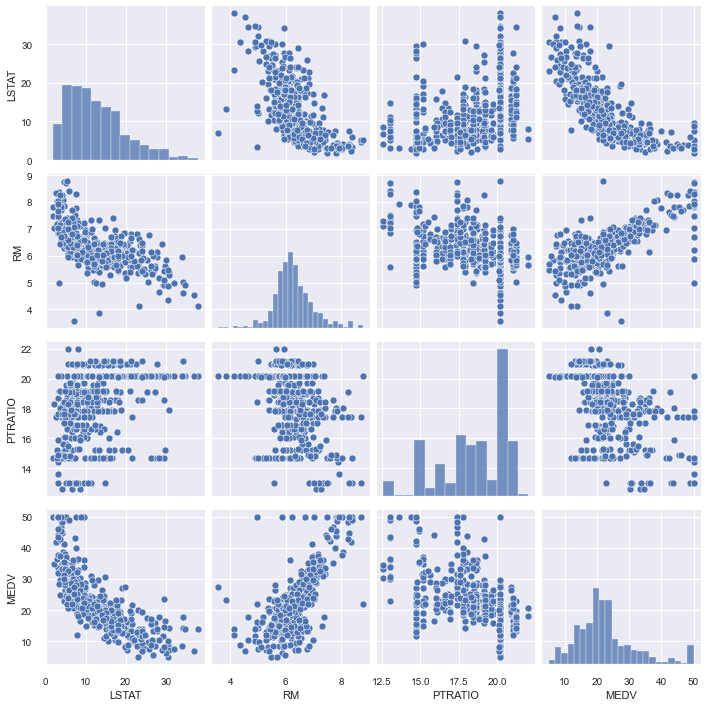

In [9]:
sns.pairplot(df[["LSTAT","RM","PTRATIO","MEDV"]])
plt.show()

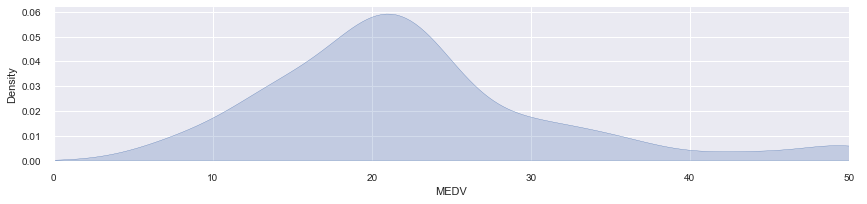

In [10]:
# show price distribution
facet = sns.FacetGrid(df,aspect=4)
facet.map(sns.kdeplot,'MEDV',shade= True)
facet.set(xlim=(0, df['MEDV'].max()))
facet.add_legend() 
plt.show()

### 4. Machine Learning

In [11]:
import datetime
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x, y = df.iloc[:, :-1], df['MEDV']

In [13]:
# Standardize data for machine learning
from sklearn.preprocessing import StandardScaler
transfer=StandardScaler()

In [14]:
x = transfer.fit_transform(x)
y = transfer.fit_transform(y.values.reshape(-1, 1)).ravel()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [17]:
# try linear regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [18]:
linear_model.score(x_test, y_test)

0.6687594935356322

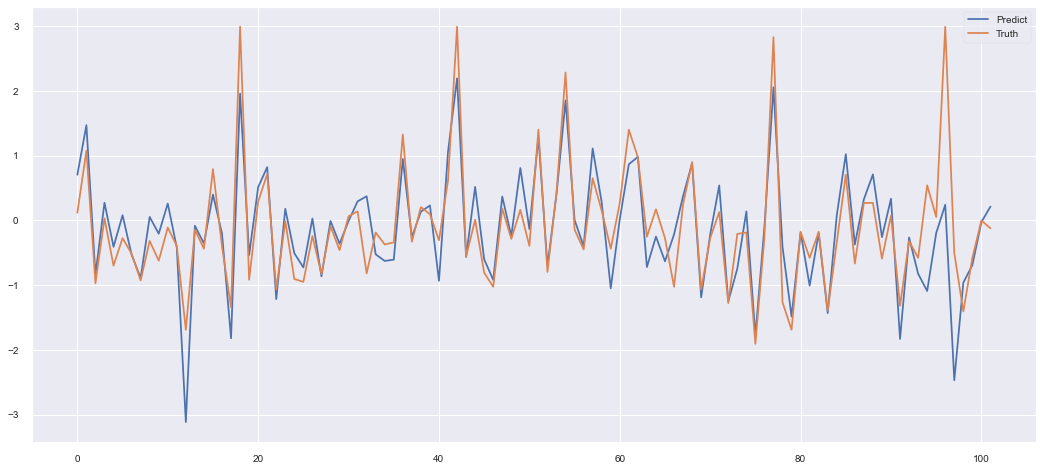

In [19]:
# compare true & predicted prices
hos_pre = pd.DataFrame()
hos_pre['Predict'] = linear_model.predict(x_test)
hos_pre['Truth'] = list(y_test)
hos_pre.plot(figsize=(18,8))
plt.show()

In [20]:
# show coefficients per feature
df_coef = pd.DataFrame()
df_coef['Title'] = df.iloc[:,:-1].columns
df_coef['Coef'] = linear_model.coef_
df_coef

,Title,Coef
0,CRIM,-0.105735
1,ZN,0.076356
2,INDUS,0.030121
3,CHAS,0.076897
4,NOX,-0.216742
5,RM,0.339107
6,AGE,-0.019271
7,DIS,-0.331494
8,RAD,0.248453
9,TAX,-0.195103


In [21]:
df.corr()['MEDV'].abs().sort_values(ascending=False).head(4)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
Name: MEDV, dtype: float64

In [28]:
# benchmark different models
def model_selection(X,Y):
    
    Algorithm = []
    Accuracy = []
    Time = []
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # try linear regression 
    Algorithm.append('Linear Regression')
    
    start_time = datetime.datetime.now()
    
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    
    linear_accuracy = f"{np.round(100*linear_model.score(x_test, y_test),2)}%"
    Accuracy.append(linear_accuracy)
    
    end_time = datetime.datetime.now()
    linear_cal_time = (end_time-start_time).seconds
    Time.append(linear_cal_time)
    
    # try ElasticNet
    Algorithm.append('ElasticNet')
    
    start_time = datetime.datetime.now()
    
    enet = ElasticNet()
    enet.fit(x_train, y_train)
    
    enet_accuracy = f"{np.round(100*enet.score(x_test, y_test),2)}%"
    Accuracy.append(enet_accuracy)
    
    end_time = datetime.datetime.now()
    enet_cal_time = (end_time-start_time).seconds
    Time.append(enet_cal_time)

    # try SVR
    for i in ["linear","poly","rbf"]:
        Algorithm.append(f'SVR-{i}')

        start_time = datetime.datetime.now()

        svr = SVR(kernel=i) 
        svr.fit(x_train, y_train)

        svr_accuracy = f"{np.round(100*svr.score(x_test, y_test),2)}%"
        Accuracy.append(svr_accuracy)

        end_time = datetime.datetime.now()
        svr_cal_time = (end_time-start_time).seconds
        Time.append(svr_cal_time)

    # try Gradient Boosting Regressor
    Algorithm.append('Gradient Boosting Regressor')
    
    start_time = datetime.datetime.now()
    
    clf = ensemble.GradientBoostingRegressor()
    clf.fit(x_train, y_train)
    
    clf_accuracy = f"{np.round(100*clf.score(x_test, y_test),2)}%"
    Accuracy.append(clf_accuracy)
    
    end_time = datetime.datetime.now()
    clf_cal_time = (end_time-start_time).seconds
    Time.append(clf_cal_time)
    
    # show test result
    test_result = pd.DataFrame({"Algorithm":Algorithm,"Time(Seconds)": Time,"Test Set Accuracy":Accuracy})
    
    return(test_result)

In [29]:
model_selection(x,y)

,Algorithm,Time(Seconds),Test Set Accuracy
0,Linear Regression,0,66.88%
1,ElasticNet,0,26.49%
2,SVR-linear,0,60.61%
3,SVR-poly,0,80.29%
4,SVR-rbf,0,82.13%
5,Gradient Boosting Regressor,0,91.2%
